C:\Users\anist\AppData\Local\Temp\ipykernel_8396\1544583894.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


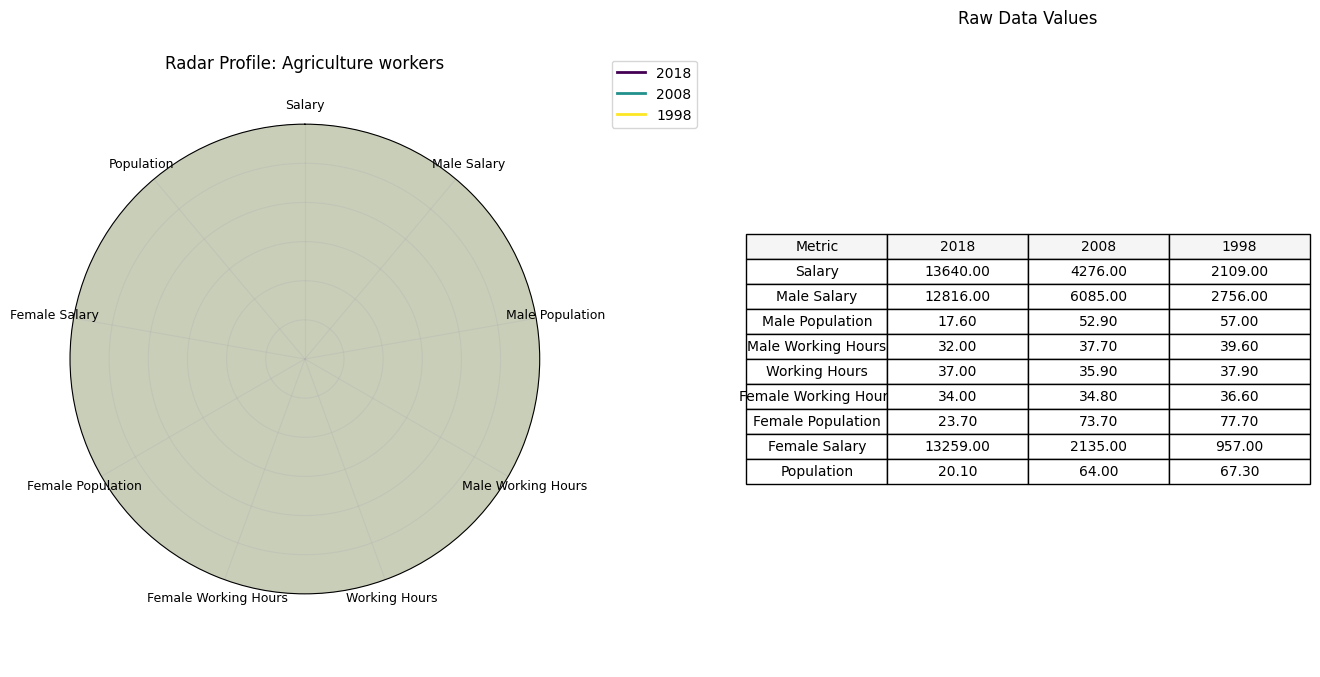

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def create_radar_table(Occupation):
    # Load and prepare data
    occupation_data = merged_df[merged_df["Occupation"] == Occupation].iloc[0]
    
    # Create figure with controlled layout
    fig = plt.figure(figsize=(16, 8), facecolor='white')
    gs = GridSpec(1, 2, width_ratios=[1, 1.2], wspace=0.4)

    # =====================
    # Radar Plot (Left)
    # =====================
    ax1 = fig.add_subplot(gs[0], polar=True)
    
    # Configure label order for smooth circular flow
    radar_labels = [
        "Salary", "Male Salary", "Male Population",
        "Male Working Hours", "Working Hours", 
        "Female Working Hours", "Female Population",
        "Female Salary", "Population"
    ]
    
    # Generate angles and close the circle
    angles = np.linspace(0, 2*np.pi, len(radar_labels), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    
    # Configure plot parameters
    ax1.set_theta_offset(np.pi/2)  # Start from top
    ax1.set_theta_direction(-1)    # Clockwise direction
    ax1.set_ylim(-3, 3)            # Fixed scale
    ax1.set_facecolor("#F8F9FA")
    ax1.grid(alpha=0.3)

    # Plot data for each year
    for i, year in enumerate(['2018', '2008', '1998']):
        values = [
            occupation_data[f'total_ear_{year}'],
            occupation_data[f'male_ear_{year}'],
            occupation_data[f'male_pop_{year}'],
            occupation_data[f'male_wor_{year}'],
            occupation_data[f'total_wor_{year}'],
            occupation_data[f'female_wor_{year}'],
            occupation_data[f'female_pop_{year}'],
            occupation_data[f'female_ear_{year}'],
            occupation_data[f'total_pop_{year}']
        ]
        values += values[:1]  # Close the shape
        
        ax1.plot(angles, values, linewidth=2, 
                color=plt.cm.viridis(i/2), 
                label=f'{year}')
        ax1.fill(angles, values, alpha=0.15, 
                color=plt.cm.viridis(i/2))

    # Format labels and ticks
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(radar_labels, fontsize=9)
    ax1.set_yticks(np.arange(-3, 4, 1))
    ax1.set_yticklabels([])  # Hide radial labels
    ax1.legend(loc='upper right', bbox_to_anchor=(1.35, 1.15))
    ax1.set_title(f"Radar Profile: {Occupation}\n", pad=25)

    # =====================
    # Data Table (Right)
    # =====================
    ax2 = fig.add_subplot(gs[1])
    ax2.axis('off')
    
    # Prepare table data
    table_data = []
    for label in radar_labels:
        row = [label]
        for year in ['2018', '2008', '1998']:
            col = {
                "Salary": f'total_ear_{year}',
                "Male Salary": f'male_ear_{year}',
                "Male Population": f'male_pop_{year}',
                "Male Working Hours": f'male_wor_{year}',
                "Working Hours": f'total_wor_{year}',
                "Female Working Hours": f'female_wor_{year}',
                "Female Population": f'female_pop_{year}',
                "Female Salary": f'female_ear_{year}',
                "Population": f'total_pop_{year}'
            }[label]
            row.append(f"{occupation_data[col]:.2f}")
        table_data.append(row)

    # Create table
    table = ax2.table(cellText=table_data,
                     colLabels=['Metric', '2018', '2008', '1998'],
                     cellLoc='center',
                     loc='center',
                     colColours=['#f5f5f5']*4)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    ax2.set_title("Raw Data Values", pad=20)

    plt.tight_layout()
    plt.show()

# Test with sample occupation
create_radar_table("Agriculture workers")